Name : Lakshminath Reddy Alamuru        
SUID: 367982169             
Malware Classification Project : The Goal is to classify whether the file is malicious or benign

Environment Setup

Import relevant modules such as pandas, numpy, sklearn, matplotlib

In [ ]:
#import relevant modules

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


In [ ]:
1. Load Dataset(MalwareData.csv)

In [ ]:
# ==================================================================
# 1. Load Dataset
# Loaded the MalwareData.csv file
# ==================================================================

df = pd.read_csv("MalwareData.csv", sep="|")
print("Shape:", df.shape)
print(df.head(3))

Shape: (138047, 57)
          Name                               md5  Machine  \
0  memtest.exe  631ea355665f28d4707448e442fbf5b8      332   
1      ose.exe  9d10f99a6712e28f8acd5641e3a7ea6b      332   
2    setup.exe  4d92f518527353c0db88a70fddcfd390      332   

   SizeOfOptionalHeader  Characteristics  MajorLinkerVersion  \
0                   224              258                   9   
1                   224             3330                   9   
2                   224             3330                   9   

   MinorLinkerVersion  SizeOfCode  SizeOfInitializedData  \
0                   0      361984                 115712   
1                   0      130560                  19968   
2                   0      517120                 621568   

   SizeOfUninitializedData  ...  ResourcesNb  ResourcesMeanEntropy  \
0                        0  ...            4              3.262823   
1                        0  ...            2              4.250461   
2                        0 

2. Data Exploration and Feature Engineering
Dropped the columns which is not required such as Name, md5 which doesn't impact the training. Then normalize or standardize features using StandardScaler. Perfomed PCA for dimensionality reduction with 0.80 as well

In [ ]:
y = df["legitimate"]

drop_cols = [
    "Name", "md5", "CheckSum", "LoaderFlags", "BaseOfData",
    "Machine", "NumberOfRvaAndSizes",
    "MajorOperatingSystemVersion", "MinorOperatingSystemVersion",
    "MajorImageVersion", "MinorImageVersion",
    "MajorSubsystemVersion", "MinorSubsystemVersion",
    "MajorLinkerVersion", "MinorLinkerVersion",
    "Subsystem", "DllCharacteristics"
]

X = df.drop(columns=drop_cols + ["legitimate"], errors="ignore")
X = X.apply(pd.to_numeric, errors="coerce")

# Fix NaN / Inf
X = X.replace([np.inf, -np.inf], np.nan).fillna(0)
X = np.nan_to_num(X, nan=0.0, posinf=1e6, neginf=-1e6)

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA for dimensionality reduction
pca = PCA(n_components=0.80, random_state=42)
X_pca = pca.fit_transform(X_scaled)
print("PCA reduced dimensions:", X_pca.shape[1])

PCA reduced dimensions: 20


3. Split the train and test data as 80-20

In [ ]:
# ==================================================================
# 3. Train-Test Split with 80-20
# ==================================================================
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, stratify=y, random_state=42
)
print("\nTraining samples:", len(y_train))
print("Testing samples:", len(y_test))


Training samples: 110437
Testing samples: 27610


4. Developed and defined all the supervised learning classifiers such as Random forest classifier, Linear SVM, Neural Network, KNN and XGBoost models with deafult values


==================== Default model results with confunsion matrix ====================

===== Random Forest =====
5-Fold Validation Accuracy: 0.9907096409285417
Accuracy: 0.9908
Precision: 0.9802
Recall: 0.9891
F1-score: 0.9846
ROC-AUC: 0.999180349426163


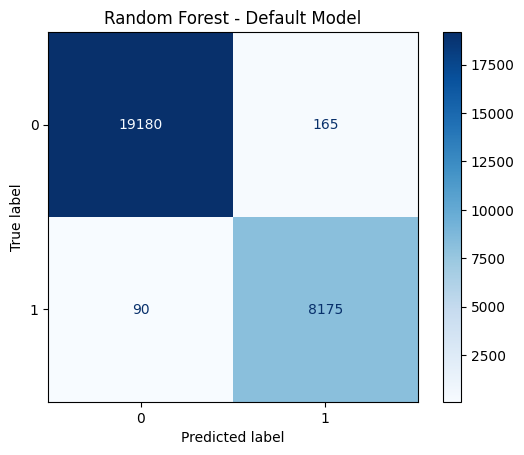


===== Linear SVM =====
5-Fold Validation Accuracy: 0.9699919408459585
Accuracy: 0.9702
Precision: 0.9671
Recall: 0.9321
F1-score: 0.9493
ROC-AUC: nan


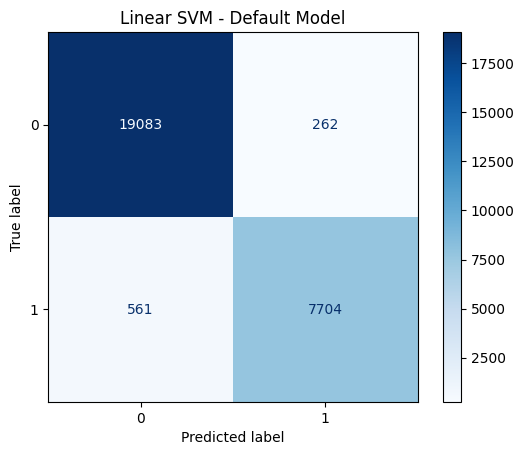


===== Neural Network =====
5-Fold Validation Accuracy: 0.9882467048954131
Accuracy: 0.9891
Precision: 0.9780
Recall: 0.9858
F1-score: 0.9819
ROC-AUC: 0.9987421977819567


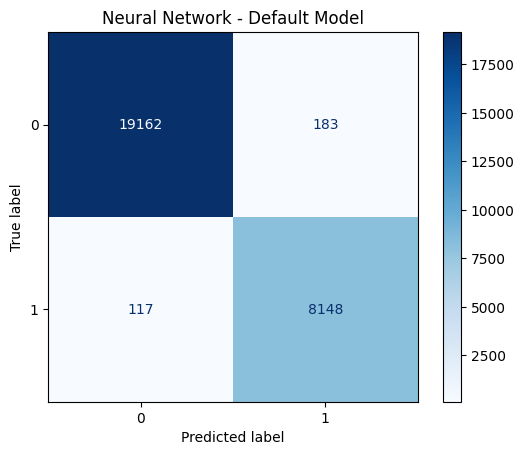


===== KNN =====
5-Fold Validation Accuracy: 0.9878392163635535
Accuracy: 0.9877
Precision: 0.9754
Recall: 0.9837
F1-score: 0.9795
ROC-AUC: 0.9963473415582341


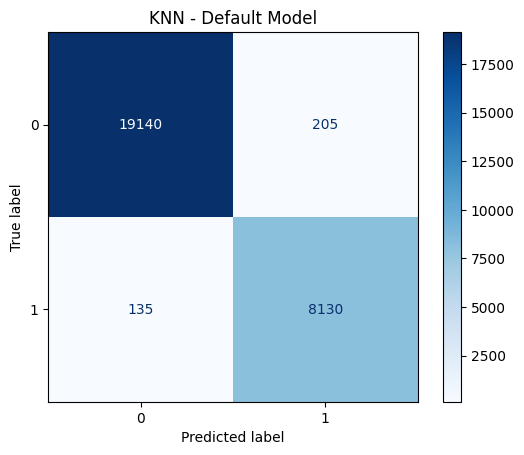


===== XGBoost =====
5-Fold Validation Accuracy: 0.9887447136834518
Accuracy: 0.9891
Precision: 0.9783
Recall: 0.9856
F1-score: 0.9819
ROC-AUC: 0.9989838224226979


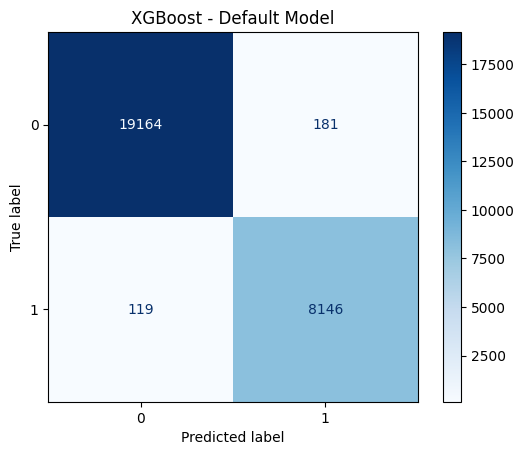

In [ ]:
# ==================================================================
# 4. Default Models
# Declared supervised learning models such as Random forest classifier, 
# Linear SVM, Neural Network, KNN and XGBoost models with deafult values
# ==================================================================
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Linear SVM": LinearSVC(C=1.0, max_iter=5000),
    "Neural Network": MLPClassifier(
        hidden_layer_sizes=(64, 32),
        activation="relu",
        solver="adam",
        early_stopping=True,
        learning_rate_init=0.001,
        max_iter=300,
        random_state=42
    ),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "XGBoost": XGBClassifier(
        n_estimators=150,
        max_depth=5,
        learning_rate=0.1,
        subsample=0.9,
        colsample_bytree=0.9,
        eval_metric="logloss",
        tree_method="hist"
    )
}

results_default = {}

print("\n==================== Default model results with confunsion matrix ====================")
for name, model in models.items():
    print(f"\n===== {name} =====")

    cv_score = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy").mean()
    print("5-Fold Validation Accuracy:", cv_score)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Metrics
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        roc = roc_auc_score(y_test, y_prob)
    else:
        roc = np.nan

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results_default[name] = [acc, prec, rec, f1, roc]

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC-AUC: {roc}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"{name} - Default Model")
    plt.show()

5. Hyper parameter tuning perfomed for all the classifier models to improve the accuaracy in a safe manner


==================== Tuned model results with confusion matrix ====================

===== Tuning Random Forest =====
Best Parameters: {'max_depth': 20, 'n_estimators': 200}
Tuned Accuracy: 0.9904
Tuned Precision: 0.9789
Tuned Recall: 0.9894
Tuned F1-score: 0.9841
Tuned ROC-AUC: 0.9994571396539763


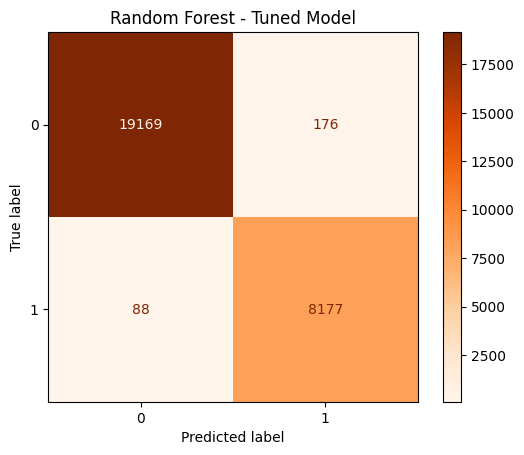


===== Tuning Linear SVM =====


/Users/lakshminathreddyalamuru/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/lakshminathreddyalamuru/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/lakshminathreddyalamuru/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/lakshminathreddyalamuru/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/lakshminathreddyalamuru/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/lakshminathreddyalamuru/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in mat

Best Parameters: {'C': 0.5}
Tuned Accuracy: 0.9702
Tuned Precision: 0.9671
Tuned Recall: 0.9321
Tuned F1-score: 0.9493
Tuned ROC-AUC: nan


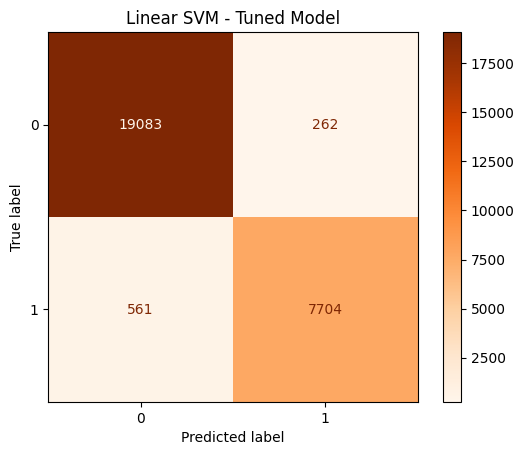


===== Tuning Neural Network =====


/Users/lakshminathreddyalamuru/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/lakshminathreddyalamuru/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/lakshminathreddyalamuru/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/lakshminathreddyalamuru/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/lakshminathreddyalamuru/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/lakshminathreddyalamuru/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in mat

Best Parameters: {'hidden_layer_sizes': (16, 8), 'learning_rate_init': 0.001, 'max_iter': 300}
Tuned Accuracy: 0.9859
Tuned Precision: 0.9700
Tuned Recall: 0.9832
Tuned F1-score: 0.9766
Tuned ROC-AUC: 0.9973392268918391


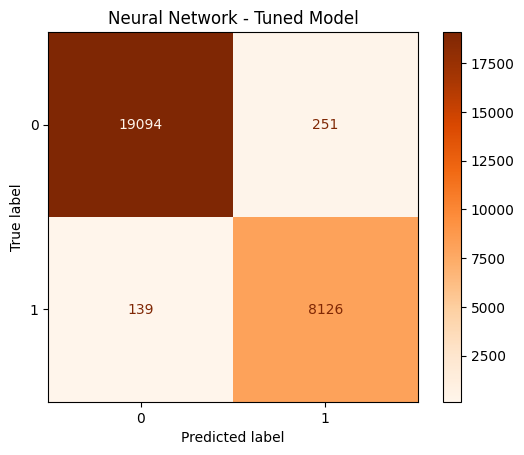


===== Tuning KNN =====
Best Parameters: {'n_neighbors': 7, 'weights': 'distance'}
Tuned Accuracy: 0.9906
Tuned Precision: 0.9802
Tuned Recall: 0.9885
Tuned F1-score: 0.9843
Tuned ROC-AUC: 0.9971022711903152


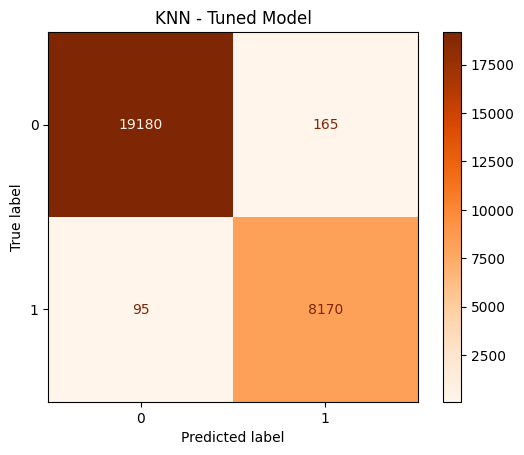


===== Tuning XGBoost =====
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}
Tuned Accuracy: 0.9888
Tuned Precision: 0.9771
Tuned Recall: 0.9856
Tuned F1-score: 0.9813
Tuned ROC-AUC: 0.9990468327752027


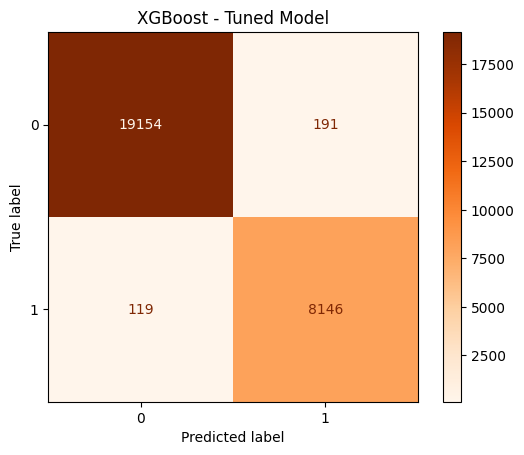

In [ ]:
#====================================================================
# 5. Hyperparameter Tuning
# Here, on various trails by reading the data and observing the results
# tuned the parameters to improve the accuracy
# ====================================================================
param_grids = {
    "Random Forest": {"n_estimators": [100, 200], "max_depth": [None, 20, 30]},
    "Linear SVM": {"C": [0.5, 1, 5]},
    "Neural Network": {"hidden_layer_sizes": [(16,), (16, 8)], "learning_rate_init": [0.001, 0.0005], "max_iter": [300]},
    "KNN": {"n_neighbors": [3, 5, 7], "weights": ["uniform", "distance"]},
    "XGBoost": {"n_estimators": [100, 150], "max_depth": [4, 5], "learning_rate": [0.05, 0.1]}
}

tuned_models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Linear SVM": LinearSVC(max_iter=5000),
    "Neural Network": MLPClassifier(
        hidden_layer_sizes=(32, 16),
        activation="tanh",
        solver="adam",
        learning_rate_init=0.0005,
        early_stopping=True,
        max_iter=400,
        max_fun=12000,
        random_state=42
    ),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(eval_metric="logloss", tree_method="hist")
}

results_tuned = {}

print("\n==================== Tuned model results with confusion matrix ====================")
for name, model in tuned_models.items():
    print(f"\n===== Tuning {name} =====")
    
    gs = GridSearchCV(model, param_grids[name], cv=3, scoring="accuracy", n_jobs=-1)
    gs.fit(X_train, y_train)
    
    best_model = gs.best_estimator_
    print("Best Parameters:", gs.best_params_)

    y_pred = best_model.predict(X_test)

    if hasattr(best_model, "predict_proba"):
        y_prob = best_model.predict_proba(X_test)[:, 1]
        roc = roc_auc_score(y_test, y_prob)
    else:
        roc = np.nan

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results_tuned[name] = [acc, prec, rec, f1, roc]

    print(f"Tuned Accuracy: {acc:.4f}")
    print(f"Tuned Precision: {prec:.4f}")
    print(f"Tuned Recall: {rec:.4f}")
    print(f"Tuned F1-score: {f1:.4f}")
    print(f"Tuned ROC-AUC: {roc}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap=plt.cm.Oranges)
    plt.title(f"{name} - Tuned Model")
    plt.show()

6. Summary Tables which shows detailed view for all models with all metrics

In [ ]:
# ==================================================================
# 6. Summary Tables
# It shows the metrics for all models for both default and tuned models
# ==================================================================
print("\n==================== DEFAULT MODEL SUMMARY ====================")
summary_default = pd.DataFrame(
    results_default,
    index=["Accuracy", "Precision", "Recall", "F1-score", "ROC-AUC"]
)
print(summary_default)

print("\n==================== TUNED MODEL SUMMARY ====================")
summary_tuned = pd.DataFrame(
    results_tuned,
    index=["Accuracy", "Precision", "Recall", "F1-score", "ROC-AUC"]
)
print(summary_tuned)



==================== DEFAULT MODEL SUMMARY ====================
           Random Forest  Linear SVM  Neural Network       KNN   XGBoost
Accuracy        0.990764    0.970192        0.989134  0.987686  0.989134
Precision       0.980216    0.967110        0.978034  0.975405  0.978263
Recall          0.989111    0.932123        0.985844  0.983666  0.985602
F1-score        0.984643    0.949295        0.981923  0.979518  0.981919
ROC-AUC         0.999180         NaN        0.998742  0.996347  0.998984

==================== TUNED MODEL SUMMARY ====================
           Random Forest  Linear SVM  Neural Network       KNN   XGBoost
Accuracy        0.990438    0.970192        0.985875  0.990583  0.988772
Precision       0.978930    0.967110        0.970037  0.980204  0.977090
Recall          0.989353    0.932123        0.983182  0.988506  0.985602
F1-score        0.984114    0.949295        0.976565  0.984337  0.981328
ROC-AUC         0.999457         NaN        0.997339  0.997102  0.999

7. Comparison Plot shown below

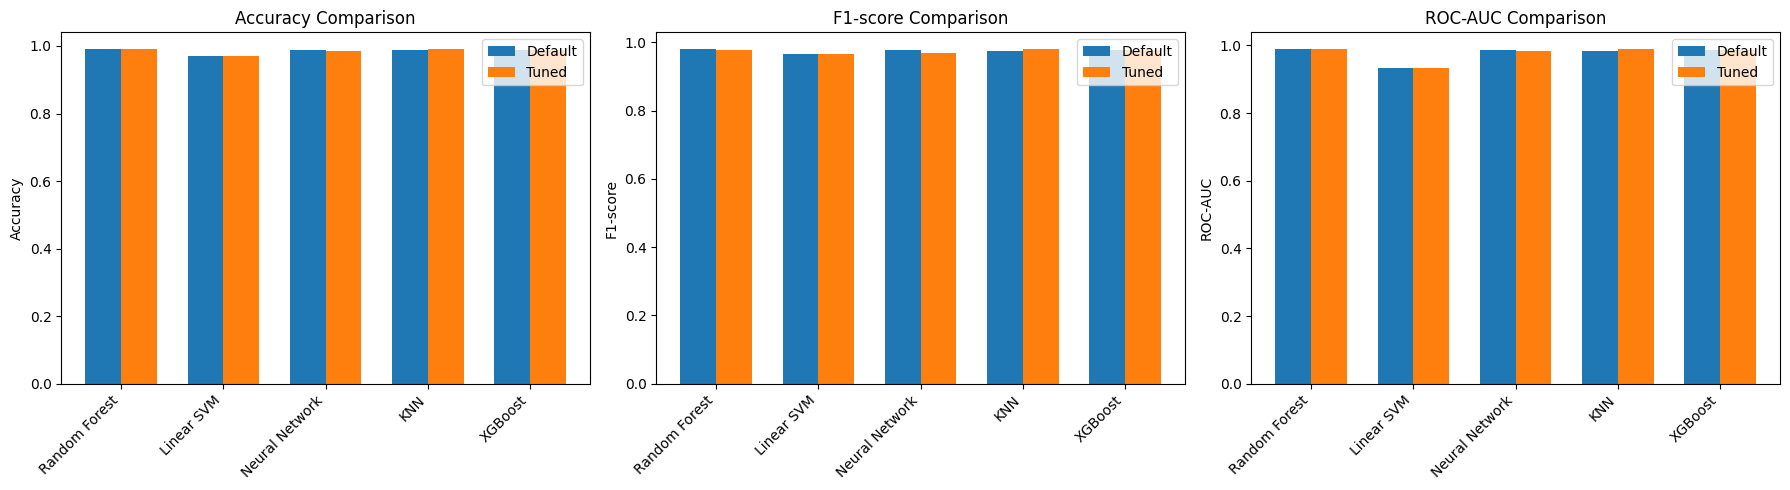

In [ ]:
# ==================================================================
# 7. Comparison Plot (Accuracy, F1, ROC-AUC)
# Graphs are shown by comparing the results with tuned and default models
# ==================================================================
metrics_to_plot = ["Accuracy", "F1-score", "ROC-AUC"]
x = np.arange(len(models))

fig, ax = plt.subplots(1, 3, figsize=(18, 5))

for i, metric in enumerate(metrics_to_plot):
    default_vals = [results_default[m][metrics_to_plot.index(metric)] for m in models]
    tuned_vals = [results_tuned[m][metrics_to_plot.index(metric)] for m in models]
    
    width = 0.35
    ax[i].bar(x - width/2, default_vals, width, label="Default")
    ax[i].bar(x + width/2, tuned_vals, width, label="Tuned")
    ax[i].set_xticks(x)
    ax[i].set_xticklabels(models.keys(), rotation=45, ha="right")
    ax[i].set_ylabel(metric)
    ax[i].set_title(f"{metric} Comparison")
    ax[i].legend()

plt.tight_layout()
plt.show()

Summary of Results

Across both default and tuned configurations, all models achieved very strong performance, with accuracy generally above 97–99%.
Random Forest and XGBoost consistently performed at the top, showing high accuracy, precision, recall, and ROC-AUC (~0.999) in both default and tuned versions.
KNN improved noticeably after tuning, raising accuracy from 98.7% to 99.0%, making it competitive with Random Forest.
Neural Network performed well, but did not surpass tree-based methods even after tuning.
Linear SVM was the weakest performer, with lower recall (~93%) due to difficulty capturing complex nonlinear patterns in the dataset.
Overall, ensemble methods (RF, XGBoost) were the most robust, showing strong generalization and high separability of classes.


Reflect on limitations and possible improvements

The dataset is quite imbalanced (70% benign vs. 30% malware), which can make the models look better than they actually are and may cause overfitting.
Most models achieved very high scores, so we may need stronger validation or testing on unseen data to be confident they generalize well.
Our hyperparameter search was fairly limited, and exploring a wider range—especially for SVMs and neural networks could improve performance.